In [1]:
import xarray as xr
import numpy as np
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

In [26]:
list_files_def = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.20*.nc")
list_files_def = sorted(list_files_def)
size_iteration = len(list_files_def)

print(size_iteration)

variables = ['TSA', 'TSKIN','GRAINC_TO_FOOD','GRAINN','GRAINC','NPP','WOODC','NFERTILIZATION']
results_def= np.zeros((len(variables), (size_iteration)))

372


In [27]:
# store in "results"
for i in range(size_iteration):
    #print(i)
    dset2_def = xr.open_dataset(list_files_def[i], decode_times=False)
    
    for j in range(len(variables)):
        results_def[j, i] = dset2_def[variables[j]].sum(['lat','lon'])

In [25]:
start_date1 = '2029-01'
end_date1   = '2060-01'
time2 = pd.date_range(start=start_date1, end=end_date1, freq='M')
print(len(time2))
#print(time2.strftime('%Y-%m'))
#results_def=results_def.assign_coords(time=time2)


372


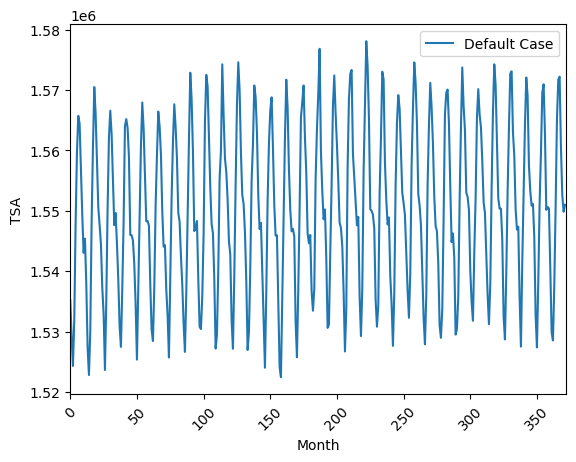

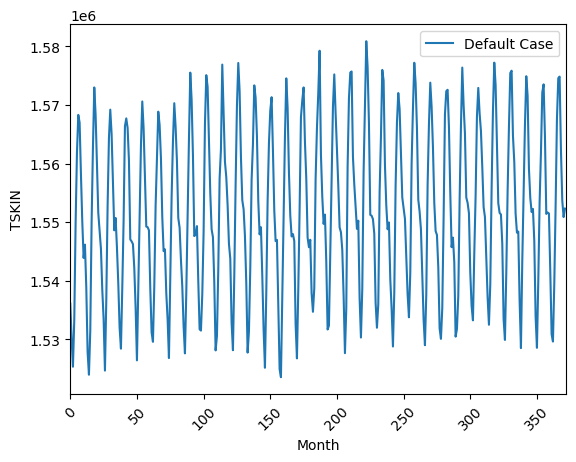

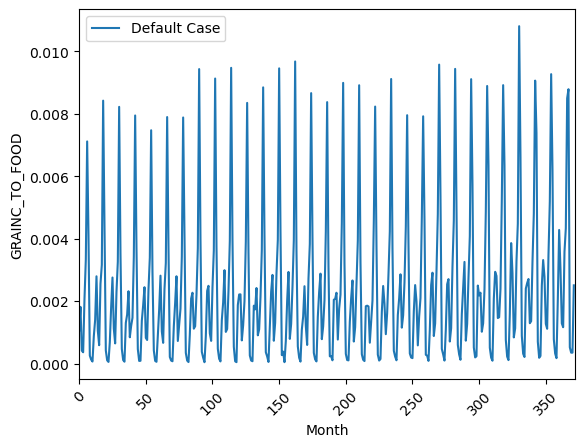

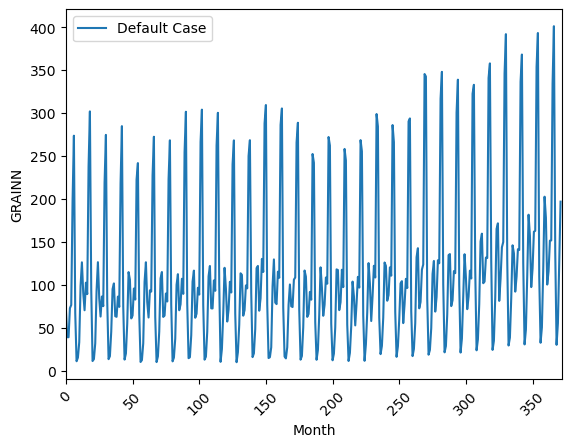

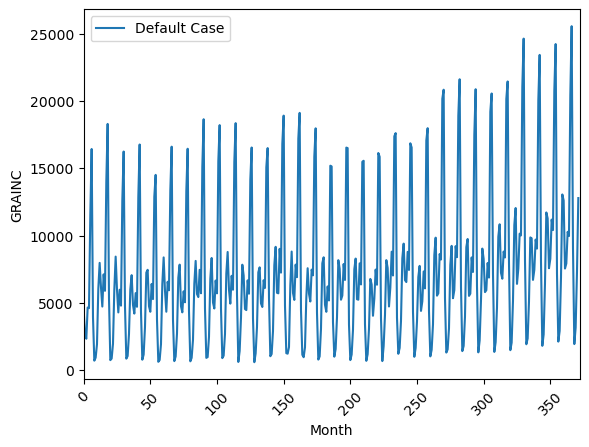

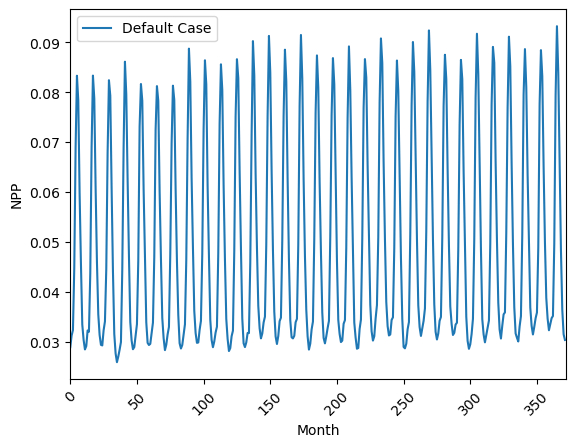

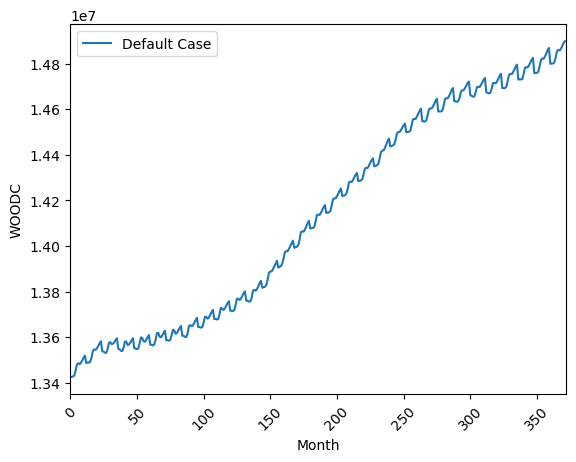

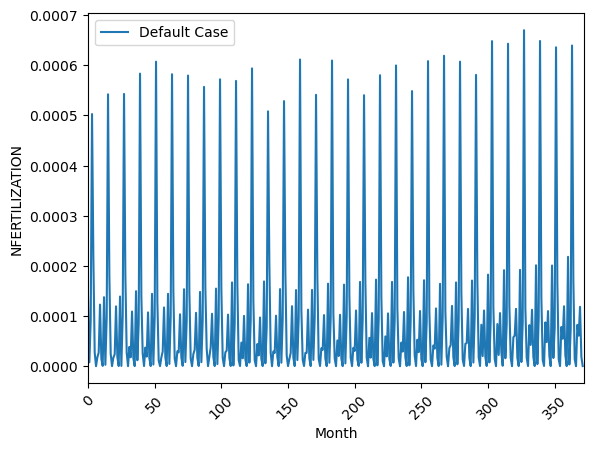

In [28]:
# plot
for k in range(len(variables)):
    dset2_corn = xr.open_dataset(list_files_def[k], decode_times=False)
    fig, ax = plt.subplots()
    plt.plot(results_def[k], label='Default Case')
    plt.xlim(0,size_iteration)
    plt.xlabel('Month')
    plt.ylabel(variables[k])
    plt.legend()
    #plt.savefig(variables[k]+'.png')
    # Format x-axis labels as year-month
    plt.xticks(rotation=45)
 

In [16]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming list_files_def contains the file paths for your datasets
for k in range(len(variables)):
    dset2_corn = xr.open_dataset(list_files_def[k], decode_times=False)
    
    # Group by year and calculate annual means
    annual_means = dset2_corn.groupby(dset2_corn['time'].dt.year).mean(dim='time')
    
    fig, ax = plt.subplots()
    plt.plot(annual_means[variables[k]], label='Default Case')
    plt.xlabel('Year')
    plt.ylabel(variables[k])
    plt.legend()

    plt.show()  # Depending on your use case, you might want to use plt.show() here


TypeError: '.dt' accessor only available for DataArray with datetime64 timedelta64 dtype or for arrays containing cftime datetime objects.

##Spatial plots of GRAINC_FOOD, convert the unit to GtC/year 

In [12]:
sum_cropyield_def=0
sum_cropyield_corn=0
sum_cropyield_sgrass=0
for i in range(size_iteration):
    dset_case_def = xr.open_dataset(list_files_def[i], decode_times=False)
    dset_case_corn = xr.open_dataset(list_files_corn[i], decode_times=False)
    dset_case_sgrass = xr.open_dataset(list_files_switchgrass[i], decode_times=False)
    sum_cropyield_def+=dset_case_def['GRAINC_TO_FOOD'].sum(['time'])
    sum_cropyield_corn+=dset_case_corn['GRAINC_TO_FOOD'].sum(['time'])
    sum_cropyield_sgrass+=dset_case_sgrass['GRAINC_TO_FOOD'].sum(['time'])
    #sum_cropyield +=cropyield  
Grain_yield_def= (sum_cropyield_def*(0.85/0.45)*86400*30)/100 # converting to crop yield in gC/m2
Grain_yield_corn= (sum_cropyield_corn*(0.85/0.45)*86400*30)/100 # converting to crop yield in gC/m2
Grain_yield_sgrass= (sum_cropyield_sgrass*(0.85/0.45)*86400*30)/100 # converting to crop yield in gC/m2

#Grain_yield =Grain_yield/100 # converting gC/m2 to tonnes/hectar # converting gC/m2 to tonnes/hectar



In [38]:
print(sum_cropyield_def.sum())
print(sum_cropyield_corn.sum())

<xarray.DataArray 'GRAINC_TO_FOOD' ()>
array(0.14823744)
<xarray.DataArray 'GRAINC_TO_FOOD' ()>
array(0.14308387)


##Spatial plots of NPP (annual sum and annual average) in gC/m^2/s and in GtC/year

In [10]:
datasets_def = []
datasets_corn = []
datasets_sgrass= []

# Loop through your datasets and append them to the list
for i in range(size_iteration):
    dset_case_def = xr.open_dataset(list_files_def[i], decode_times=False)
    dset_case_corn = xr.open_dataset(list_files_corn[i], decode_times=False)
    dset_case_sgrass = xr.open_dataset(list_files_switchgrass[i], decode_times=False)

    NPP_def = dset_case_def['NPP']
    NPP_corn = dset_case_corn['NPP']
    NPP_grass = dset_case_sgrass['NPP']

    datasets_def.append(NPP_def)
    datasets_corn.append(NPP_corn)
    datasets_sgrass.append(NPP_grass)

combined_dataset_def = xr.concat(datasets_def, dim='time')
combined_dataset_corn = xr.concat(datasets_corn, dim='time')
combined_dataset_grass = xr.concat(datasets_sgrass, dim='time')

sum_NPP_def=combined_dataset_def.sum(['time'])*86400*30  # converting gC/m2/s to gC/m2/year
sum_NPP_corn=combined_dataset_corn.sum(['time'])*86400*30
sum_NPP_sgrass=combined_dataset_grass.sum(['time'])*86400*30

mean_NPP_def=combined_dataset_def.mean(['time'])*86400*30
mean_NPP_corn=combined_dataset_corn.mean(['time'])*86400*30
mean_NPP_sgrass=combined_dataset_grass.mean(['time'])*86400*30



sum_NPP_def_GtC= sum_NPP_def*(1e-15)*dset_case_def['area']*(1e6) # converting gC/m2/s to GtC/year
sum_NPP_corn_GtC= sum_NPP_corn*(1e-15)*dset_case_corn['area']*(1e6) 
sum_NPP_sgrass_GtC= sum_NPP_sgrass*(1e-15)*dset_case_sgrass['area']*(1e6)


mean_NPP_def_GtC= mean_NPP_def*(1e-15)*dset_case_def['area']*(1e6) # converting gC/m2/s to GtC/year
mean_NPP_corn_GtC= mean_NPP_corn*(1e-15)*dset_case_corn['area']*(1e6) 
mean_NPP_sgrass_GtC= mean_NPP_sgrass*(1e-15)*dset_case_sgrass['area']*(1e6)

In [31]:
ocean_mask_file = '/cluster/shared/noresm/inputdata/share/domains/domain.ocn.fv0.9x1.25_gx1v7.151020.nc'
ocean_mask = xr.open_dataset(ocean_mask_file, decode_times=False)
mask = np.array(ocean_mask['mask'])
mask = - (mask - 1)

In [11]:
sum_NPP_def_GtC.sum()

<xarray.DataArray ()>
array(66.24812841)

In [4]:
#variables = ['sum_NPP_def','sum_NPP_corn','sum_NPP_sgrass','mean_NPP_def','mean_NPP_corn', 'mean_NPP_sgrass']
variables = ['sum_NPP_def_GtC','sum_NPP_corn_GtC','sum_NPP_sgrass_GtC','mean_NPP_def_GtC','mean_NPP_corn_GtC', 'mean_NPP_sgrass_GtC']
for variable in variables:
    # Access the data for the current variable
    data = globals()[variable]  # Assuming the variables are defined in the global scope
    fig, axs = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
    xr.set_options(cmap_sequential=plt.cm.YlGn, keep_attrs=True)
    cmap = plt.cm.get_cmap()
    cmap.set_under('gray')
    data.plot(cmap=cmap)
    zero_mask = (data == 0)
    print(zero_mask.sum())
    land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='none', facecolor='white')
    axs.add_feature(land, zorder=0)
    axs.coastlines(linewidth=1)
    axs.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs.yaxis.set_major_formatter(lat_formatter)
    axs.set_title(f'NPP (GtC/year) {variable}', fontsize=16, loc='center')
    #annual_yield = (np.sum(np.multiply(data, dset_case_def['area'])) / np.sum(dset_case_def['area']))
    axs.text(0.8, -0.3, np.sum(data).round(3), fontsize=10, color='k', ha='center', va='top',
             transform=plt.gca().transAxes)
    
    fig.patch.set_facecolor('white')
    plt.show()
    

KeyError: 'sum_NPP_def_GtC'

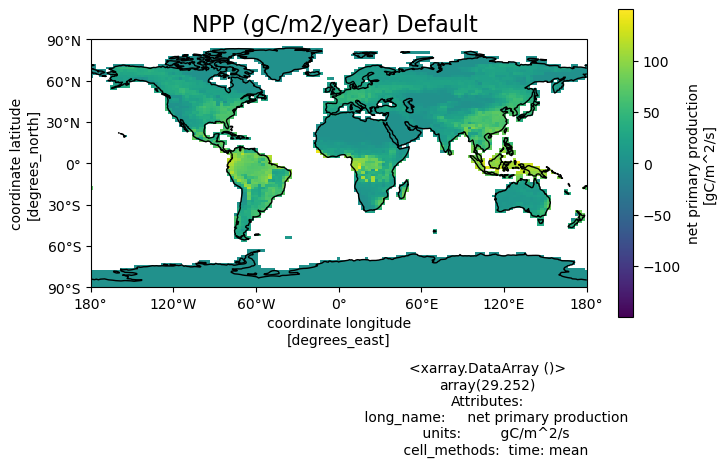

In [48]:
fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
xr.set_options(cmap_sequential=plt.cm.YlGn, keep_attrs=True)
cmap = plt.cm.get_cmap()
cmap.set_under('gray')
mean_NPP_def.plot(cmap=cmap)
land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='none',facecolor='white')
axs.add_feature(land, zorder=0)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('NPP (gC/m2/year) Default ', fontsize=16, loc='center')      
annualyield_def = (np.sum(np.multiply(mean_NPP_def, dset_case_def['area'])/(np.sum(dset_case_def['area']))))
axs.text(0.8, -0.3, annualyield_def.sum().round(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
#fig.tight_layout()
plt.show()

In [29]:
sum_NPP_def=0
sum_NPP_corn=0
sum_NPP_sgrass=0
for i in range(size_iteration):
    dset_case_def = xr.open_dataset(list_files_def[i], decode_times=False)
    dset_case_corn = xr.open_dataset(list_files_corn[i], decode_times=False)
    dset_case_sgrass = xr.open_dataset(list_files_switchgrass[i], decode_times=False)
    sum_NPP_def+=dset_case_def['NPP'].sum(['time'])
    sum_NPP_corn+=dset_case_corn['NPP'].sum(['time'])
    sum_NPP_sgrass+=dset_case_sgrass['NPP'].sum(['time'])
    #sum_cropyield +=cropyield  

NPP_GtC_def= (sum_NPP_def*86400*30) # converting gC/m2/s to gC/m2/year
NPP_GtC_corn= (sum_NPP_corn*86400*30)
NPP_GtC_sgrass= (sum_NPP_sgrass*86400*30)

NPP_GtC_def_GtC= (sum_NPP_def*86400*30)*(10e-12)*dset_case_def['area']*(10e6) # converting gC/m2/s to GtC/year
NPP_GtC_corn_GtC= (sum_NPP_corn*86400*30)*(10e-12)*dset_case_corn['area']*(10e6) 
NPP_GtC_sgrass_GtC= (sum_NPP_sgrass*86400*30)*(10e-12)*dset_case_sgrass['area']*(10e6)

In [15]:

print(dset_case_def['NPP'].sum(['time','lat','lon']))
print(NPP_GtC_def_GtC.sum())

<xarray.DataArray 'NPP' ()>
array(0.02899897)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean
<xarray.DataArray ()>
array(433007.98934874)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean


In [16]:
print(sum_NPP_def.sum())
print(sum_NPP_corn.sum())
print((np.sum(np.multiply(sum_NPP_def, dset_case_def['area'])/(np.sum(dset_case_def['area'])))))
print((np.sum(np.multiply(sum_NPP_corn, dset_case_corn['area'])/(np.sum(dset_case_def['area'])))))
print((np.sum(np.multiply(sum_NPP_sgrass, dset_case_sgrass['area'])/(np.sum(dset_case_def['area'])))))

<xarray.DataArray 'NPP' ()>
array(0.02899897)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean
<xarray.DataArray 'NPP' ()>
array(0.02798313)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean
<xarray.DataArray ()>
array(9.05508557e-06)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean
<xarray.DataArray ()>
array(8.74143715e-06)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean
<xarray.DataArray ()>
array(8.72695575e-06)
Attributes:
    long_name:     net primary production
    units:         gC/m^2/s
    cell_methods:  time: mean


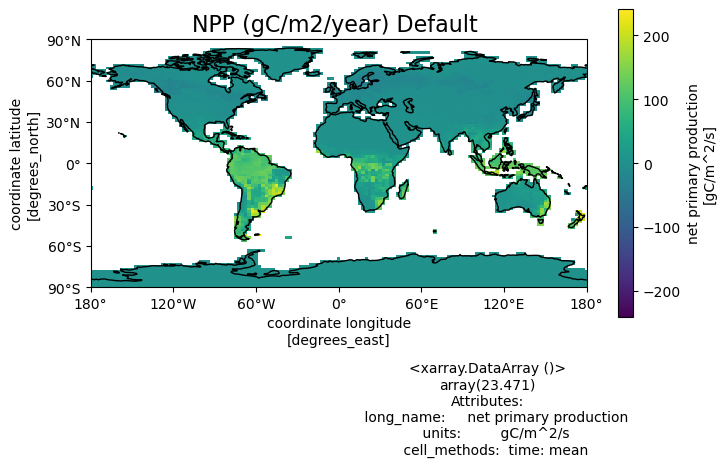

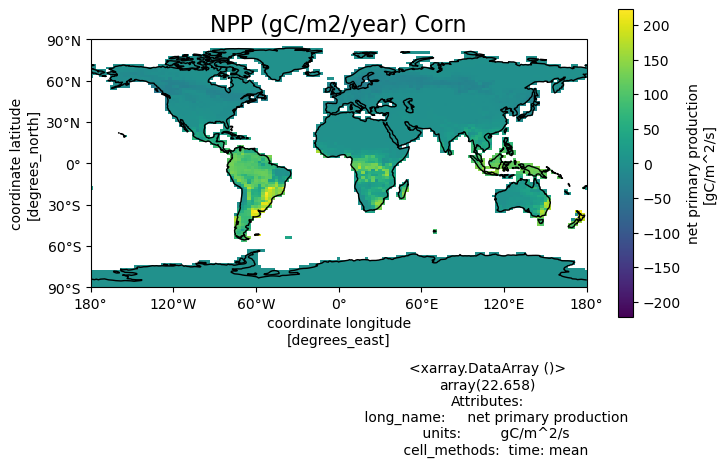

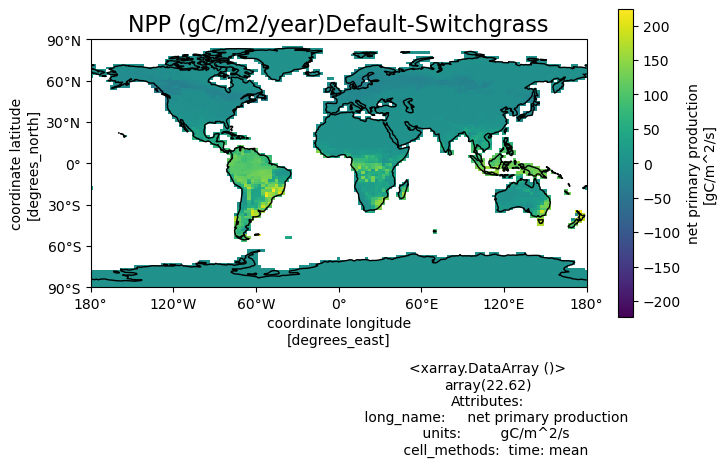

In [17]:

fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
xr.set_options(cmap_sequential=plt.cm.YlGn, keep_attrs=True)
cmap = plt.cm.get_cmap()
cmap.set_under('gray')
NPP_GtC_def.plot(cmap=cmap)
land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='none',facecolor='white')
axs.add_feature(land, zorder=0)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('NPP (gC/m2/year) Default ', fontsize=16, loc='center')      
annualyield_def = (np.sum(np.multiply(NPP_GtC_def, dset_case_def['area'])/(np.sum(dset_case_def['area']))))
axs.text(0.8, -0.3, annualyield_def.sum().round(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
#fig.tight_layout()
plt.show()



fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = plt.cm.get_cmap()
cmap.set_under('gray')
NPP_GtC_corn.plot(cmap=cmap)
land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='none',facecolor='white')
axs.add_feature(land, zorder=0)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('NPP (gC/m2/year) Corn', fontsize=16, loc='center')      
annualyield_corn = (np.sum(np.multiply(NPP_GtC_corn, dset_case_corn['area'])/(np.sum(dset_case_corn['area']))))
axs.text(0.8, -0.3, annualyield_corn.sum().round(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
#fig.tight_layout()
plt.show()


fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = plt.cm.get_cmap()
cmap.set_under('gray')
NPP_GtC_sgrass.plot(cmap=cmap)
land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='none',facecolor='white')
axs.add_feature(land, zorder=0)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('NPP (gC/m2/year)Default-Switchgrass', fontsize=16, loc='center')      
annualyield_grass = (np.sum(np.multiply(NPP_GtC_sgrass, dset_case_sgrass['area'])/(np.sum(dset_case_sgrass['area']))))
axs.text(0.8, -0.3, annualyield_grass.sum().round(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
#fig.tight_layout()
plt.show()


In [30]:
dset2_def = xr.open_dataset(list_files_def[1], decode_times=False)
dset2_def

<xarray.Dataset>
Dimensions:                  (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                              hist_interval: 2, lon: 144, lat: 96, levsoi: 20,
                              cft: 64, glc_nec: 10, ltype: 9, natpft: 15,
                              nvegwcs: 4)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) float64 59.0
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: hist_interval, levsoi, cft, glc_nec, ltype,
                                natpft, nvegwcs
Data variables: (12/473)
    mcdate                   (time) int32 ...
    mcsec                    (time) int32 ...
    mdcur                    (time) int32 ...
    mscur                    (time) int32 ...
    nstep                    (time) int32 ...
    time_bounds              (time, hist_interval) float64 ...
    ...                       ...
    XSMRPOOL                 (time, lat, lon) float64 ...
    XSMRPOOL_RECOVER         (time, lat, lon) float64 ...
    ZBOT                     (time, lat, lon) float64 ...
    ZWT                      (time, lat, lon) float64 ...
    ZWT_CH4_UNSAT            (time, lat, lon) float64 ...
    ZWT_PERCH                (time, lat, lon) float64 ...
Attributes: (12/102)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 08/10/23 16:13:31
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./NSSP534frc2esm_f19_tn14_1008...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...